In [118]:
import pandas as pd
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format


--------

In [119]:
df_companies = pd.read_excel('data/companies_v2.xlsx')
df_companies.head(10)

,company_id,sector,segment,industry,company_size,revenue,segment_2
0,comp_94b3dbfa3cdb,sec_none,МБ,NaN,48,111010.00,3
1,comp_1415fd049367,sec_9d8153193942,МБ,ind_10e261bd7cd8,78,107460.00,4
2,comp_b034aa428753,sec_28f0e3119b87,МБ,ind_28f0e3119b87,52,108389.00,4
3,comp_f6ad69a5a5a1,sec_9d370c38febe,МБ,ind_316195b443c6,30,111650.00,7
4,comp_c839caa6df52,sec_1a54105881cc,Крупный Public,ind_c3c0ab208b3b,2169,195718.00,6
5,comp_a0017e8bc5ea,sec_5fb21c55bb11,МБ,ind_5fb21c55bb11,166,102187.00,7
6,comp_a6572bb2d533,sec_1bc3700e30b8,Малый и средний Public,ind_11d103ed33f7,200,109751.00,4
7,comp_925b85138d0c,sec_9d8153193942,МБ,ind_135b1d02b8a4,99,109278.00,4
8,comp_4183fd8f65b5,sec_9d8153193942,КБ,ind_135b1d02b8a4,252,111957.00,7
9,comp_f0c6330dc2dd,sec_9d370c38febe,Corporate,ind_316195b443c6,нет данных,735073.00,6


company_id — уникальный ID клиента;

sector —закодированный отраслевой сектор;

segment — сегмент компании;

industry — закодированная индустрия;

company_size — число сотрудников;

revenue — нормированная годовая выручка компании за 23 год;

segment_2 — подсегмент компании;

Проведем первичное статистическое исследование исследование количественных и категориальных признаков.

Посмотрим на общую статистику числовых данных (количество, среднее значение, среднеквадратичное отклонение, минимальное и максимальное значения и тд.)

In [120]:
df_companies['company_size'] = pd.to_numeric(df_companies['company_size'], errors='coerce')
df_companies.describe()

,company_size,revenue,segment_2
count,2923.00,3007.00,3099.00
mean,574.26,163926.20,4.00
std,1342.45,410165.94,1.47
min,0.00,100066.00,0.00
25%,44.00,105257.00,3.00
50%,100.00,108955.00,4.00
75%,314.00,117063.00,4.00
max,14847.00,10297650.00,7.00


In [121]:
df_companies[['sector','segment','industry']] = df_companies[['sector','segment','industry']].fillna('Unknown')
df_companies.describe(include=['O'])

,company_id,sector,segment,industry
count,3099,3099,3099,3099
unique,3099,10,10,34
top,comp_94b3dbfa3cdb,sec_9d370c38febe,МБ,ind_135b1d02b8a4
freq,1,704,920,600


In [122]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    3099 non-null   object 
 1   sector        3099 non-null   object 
 2   segment       3099 non-null   object 
 3   industry      3099 non-null   object 
 4   company_size  2923 non-null   float64
 5   revenue       3007 non-null   float64
 6   segment_2     3099 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 169.6+ KB


In [123]:
df_companies.isnull().sum()

company_id        0
sector            0
segment           0
industry          0
company_size    176
revenue          92
segment_2         0
dtype: int64

Удалять будем: строки с пропуском revenue - т.к мы не можем проанализировать увеличение дохожа если не знаем начальное значение 

sector, segment, indusrty  - под вопросом - навреное есть смысл удалять данные только когда все 3 удалены 

In [124]:
df_companies.duplicated().sum() # дублей нет

np.int64(0)

------------------------    

Анализ выбросов:


<Axes: xlabel='revenue'>

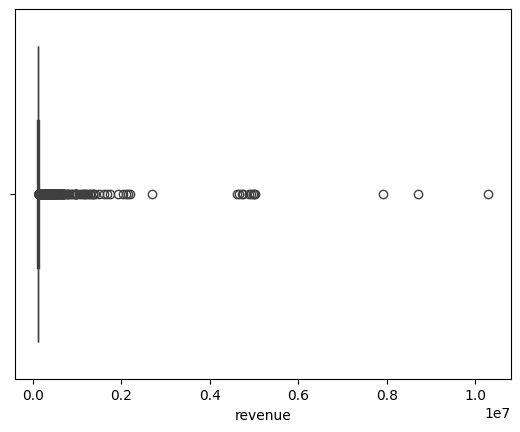

In [125]:
sns.boxplot(x=df_companies['revenue']) # посмотреть что за три правых значения / считать ли это за выброс ? 

<Axes: xlabel='company_size'>

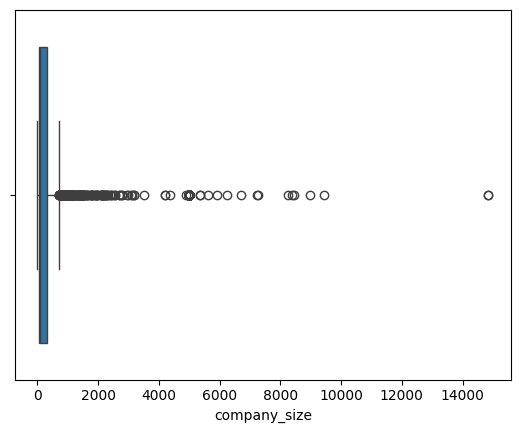

In [126]:
sns.boxplot(x=df_companies['company_size'])

<Axes: xlabel='segment_2'>

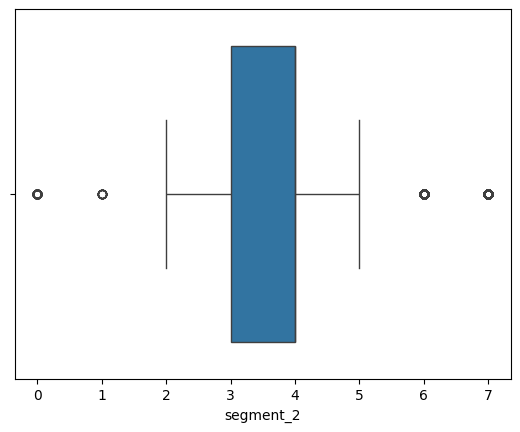

In [127]:
sns.boxplot(x=df_companies['segment_2'])

"Отклоняющиеся" значения по полям revenue, company_size не являются выбросами, и данные логически корректны. Поле segment_2 просто имеет малое число значений 0,1,6 и 7 - что тоже не является выбросом. 

Данные не нуждаются в чистке от выбросов.

In [128]:
#NOTES: оставил для возможных разборов
# Код удаления выбросов

# for column in df_companies.columns:
#     if(df_companies[column].dtype in [float, int]):
        
#         q1 = df_companies[column].quantile(0.25)
#         q3 = df_companies[column].quantile(0.75)
#         iqr = q3 - q1
#         a = q1 - 1.2 * iqr
#         b = q3 + 1.3 * iqr
#         mask = (df_companies[column] >= a) & (df_companies[column] <= b)
#         df_companies = df_companies[mask]

# df_companies.info()

<Axes: >

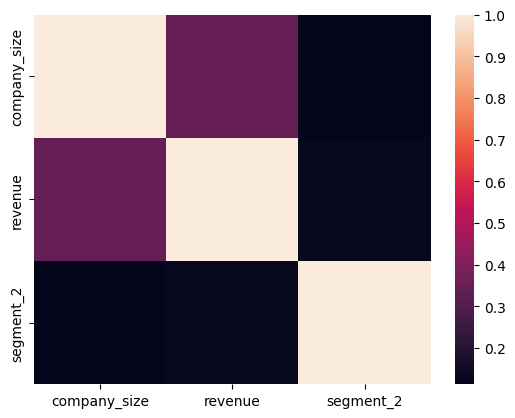

In [129]:
numeric_cols = df_companies.select_dtypes(include=['float', 'int']).columns
df_numeric = df_companies[numeric_cols]


sns.heatmap(df_numeric.corr())

Присутствует связь размера компании и дохдности на очищенных от выбросов данных ( ~ 0.6)
При не удаленных "выбросах" связь еще меньше ( ~ 0.4)

Вывод анализа: дублей нет, сильных корреляций тоже 

НО - нужно убрать замену низвестных значений для revenue на ноль - это некорректно, и выделить в группы. Также стоит строковые значения заменить на индексы в группах 

----

In [130]:
df_revenue = pd.read_excel('data/revenue_v2.xlsx')
df_revenue.head(10)

,row_id,company_id,sale_id,order_date,product_name,product_sum,kind_of_sale,product_duration
0,row_f40c971d4bac,comp_94b3dbfa3cdb,sal_34760cef17e9,2021-10-26,Расширения,10000,Продление,1.00
1,row_c05fdb605f5a,comp_94b3dbfa3cdb,sal_34760cef17e9,2021-10-26,Тарифы Webinar СМБ,11000,Продление,1.00
2,row_e44467c20a35,comp_94b3dbfa3cdb,sal_de1df99496b2,2022-04-27,Тарифы Webinar СМБ,11000,Продление,1.00
3,row_097e847fff08,comp_94b3dbfa3cdb,sal_de1df99496b2,2022-04-27,Расширения,10000,Продление,1.00
4,row_64222aceadd9,comp_94b3dbfa3cdb,sal_fbb04b9291d4,2021-11-27,Расширения,10000,Продление,1.00
5,row_551b3b2a58af,comp_94b3dbfa3cdb,sal_fbb04b9291d4,2021-11-27,Тарифы Webinar СМБ,11000,Продление,1.00
6,row_f9503dedbc6c,comp_94b3dbfa3cdb,sal_117719067179,2021-02-09,Расширения,10000,Новая,1.00
7,row_38f3adfc0033,comp_94b3dbfa3cdb,sal_117719067179,2021-02-09,Тарифы Webinar СМБ,11000,Новая,1.00
8,row_54cd22f389bb,comp_94b3dbfa3cdb,sal_8f5df72ac2f7,2023-03-17,Тарифы Webinar СМБ,11000,Продление,1.00
9,row_2b71eff6c5d1,comp_94b3dbfa3cdb,sal_8f5df72ac2f7,2023-03-17,Расширения,10000,Продление,1.00


In [131]:
df_revenue.describe()

,order_date,product_sum,product_duration
count,27119,27119.00,27119.00
mean,2020-06-22 13:40:42.169696512,14054.87,7.16
min,2014-01-22 00:00:00,10000.00,1.00
25%,2018-10-25 12:00:00,10000.00,1.00
50%,2020-11-07 00:00:00,11000.00,6.00
75%,2022-06-01 00:00:00,13000.00,12.00
max,2026-05-30 00:00:00,1000000.00,60.00
std,NaN,16895.41,6.55


In [132]:
df_revenue.describe(include=['O'])

,row_id,company_id,sale_id,product_name,kind_of_sale
count,27119,27119,27119,27119,22785
unique,27119,3099,18508,29,4
top,row_f40c971d4bac,comp_536846124f78,sal_81e21077be2b,Тарифы Webinar СМБ,Продление
freq,1,216,44,10449,13958


In [133]:
print(df_revenue['kind_of_sale'].unique())

['Продление' 'Новая' 'Возврат' 'Расширение' nan]


In [134]:
df_revenue.info()
df_revenue.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27119 entries, 0 to 27118
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            27119 non-null  object        
 1   company_id        27119 non-null  object        
 2   sale_id           27119 non-null  object        
 3   order_date        27119 non-null  datetime64[ns]
 4   product_name      27119 non-null  object        
 5   product_sum       27119 non-null  int64         
 6   kind_of_sale      22785 non-null  object        
 7   product_duration  27119 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.7+ MB


row_id                 0
company_id             0
sale_id                0
order_date             0
product_name           0
product_sum            0
kind_of_sale        4334
product_duration       0
dtype: int64

In [135]:
df_companies.duplicated().sum()

np.int64(0)

In [136]:
df_revenue[['kind_of_sale']] = df_revenue[['kind_of_sale']].fillna('Unknown') # заполнение NaN
df_revenue.isnull().sum()

row_id              0
company_id          0
sale_id             0
order_date          0
product_name        0
product_sum         0
kind_of_sale        0
product_duration    0
dtype: int64

----

Анализ выбросов

<Axes: xlabel='product_sum'>

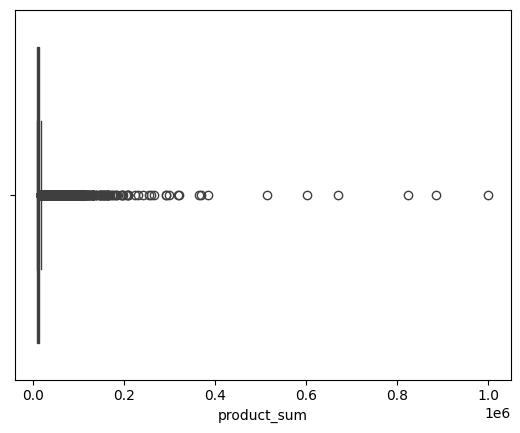

In [137]:
sns.boxplot(x=df_revenue['product_sum'])

<Axes: xlabel='product_duration'>

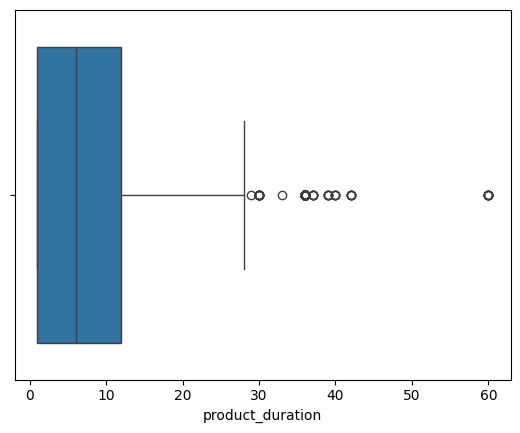

In [138]:
sns.boxplot(x=df_revenue['product_duration'])

Точечные покупки с высокой стоимостью и на длительный срок не являются выбросами данных. 

Данные не нуждаются в чистке от выбросов.


---


Объединение датасетов